In [582]:
import os
import json
import pandas as pd

In [583]:
def plot_single_result(plot_dir):
    with open(os.path.join(plot_dir, 'result.json'), 'r') as f:
        r = json.load(f)
        
    with open(os.path.join(plot_dir, 'config.json'), 'r') as f:
        x = json.load(f)
    x
    r_dfs = None
    for i in range(len(r)):
        r_df = []
        epochs = []
        for j in range(len(r[i])):
            r_df.append(r[i][j]['test'])
            epochs.append(r[i][j]['epoch'])
        r_df = pd.DataFrame(r_df)
        if r_dfs is None:
            r_dfs = r_df
        else:
            r_dfs += r_df
    r_dfs /= len(r)
    r_dfs['epochs'] = epochs
#     display(r_dfs)
    return x, r_dfs

In [584]:
exp_dir = 'experiment_0513_baseline3'
keyword = ''
keyword2 = ''

x = [os.path.join(exp_dir, s) for s in os.listdir(exp_dir) if keyword in s and keyword2 in s]
x

['experiment_0513_baseline3/20news_bert_tf-idf_MSE',
 'experiment_0513_baseline3/20news_bert_tf-idf_BCE',
 'experiment_0513_baseline3/20news_mpnet_tf-idf_MSE',
 'experiment_0513_baseline3/20news_average_tf-idf_ListNet_sigmoid_L1',
 'experiment_0513_baseline3/IMDB_mpnet_tf-idf_MSE',
 'experiment_0513_baseline3/20news_average_tf-idf_BCE',
 'experiment_0513_baseline3/20news_bert_tf-idf_ListNet_sigmoid_L1',
 'experiment_0513_baseline3/agnews_mpnet_tf-idf_BCE',
 'experiment_0513_baseline3/20news_doc2vec_tf-idf_ListNet_sigmoid_L1',
 'experiment_0513_baseline3/IMDB_mpnet_tf-idf_ListNet_sigmoid_L1',
 'experiment_0513_baseline3/20news_mpnet_bow_ListNet_sigmoid_L1',
 'experiment_0513_baseline3/20news_mpnet_tf-idf_BCE',
 'experiment_0513_baseline3/IMDB_mpnet_tf-idf_BCE',
 'experiment_0513_baseline3/20news_mpnet_bow_MSE',
 'experiment_0513_baseline3/20news_average_tf-idf_MSE',
 'experiment_0513_baseline3/20news_mpnet_yake_ListNet_sigmoid_L1',
 'experiment_0513_baseline3/agnews_mpnet_tf-idf_ListNet

In [585]:
# check empty folder
import shutil
cnt = 0

print('empty folder:')
for s in x:
    s = os.path.join(s, 'default')
    if 'result.json' not in os.listdir(s):
        cnt += 1
        print(s)

empty folder:


In [618]:
s1 = '20news_mpnet_tf-idf-gensim'
dir_f = 'experiment_0513_baseline3'

In [619]:
s = s1 + '_ListNet_sigmoid_L1'
r = plot_single_result(f'{dir_f}/{s}/default')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

FileNotFoundError: [Errno 2] No such file or directory: 'experiment_0513_baseline3/20news_mpnet_tf-idf-gensim_ListNet_sigmoid_L1/default/result.json'

In [620]:
s = s1 + '_BCE'
r = plot_single_result(f'{dir_f}/{s}/default')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

FileNotFoundError: [Errno 2] No such file or directory: 'experiment_0513_baseline3/20news_mpnet_tf-idf-gensim_BCE/default/result.json'

In [621]:
s = s1 + '_MSE'
r = plot_single_result(f'{dir_f}/{s}/default')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

FileNotFoundError: [Errno 2] No such file or directory: 'experiment_0513_baseline3/20news_mpnet_tf-idf-gensim_MSE/default/result.json'

## Cross Domain

In [488]:
exp_dir = 'experiment_cross_0510'
x = [os.path.join(exp_dir, s) for s in sorted(os.listdir(exp_dir)) if keyword in s and keyword2 in s]
x

['experiment_cross_0510/cross_wiki_20news_mpnet_tf-idf_BCE',
 'experiment_cross_0510/cross_wiki_20news_mpnet_tf-idf_ListNet2',
 'experiment_cross_0510/cross_wiki_20news_mpnet_tf-idf_ListNet3',
 'experiment_cross_0510/cross_wiki_20news_mpnet_tf-idf_ListNet_sigmoid_L1',
 'experiment_cross_0510/cross_wiki_20news_mpnet_tf-idf_MSE',
 'experiment_cross_0510/cross_wiki_IMDB_mpnet_tf-idf_BCE',
 'experiment_cross_0510/cross_wiki_IMDB_mpnet_tf-idf_ListNet2',
 'experiment_cross_0510/cross_wiki_IMDB_mpnet_tf-idf_ListNet3',
 'experiment_cross_0510/cross_wiki_IMDB_mpnet_tf-idf_ListNet_sigmoid_L1',
 'experiment_cross_0510/cross_wiki_IMDB_mpnet_tf-idf_MSE',
 'experiment_cross_0510/cross_wiki_agnews_mpnet_tf-idf_BCE',
 'experiment_cross_0510/cross_wiki_agnews_mpnet_tf-idf_ListNet2',
 'experiment_cross_0510/cross_wiki_agnews_mpnet_tf-idf_ListNet3',
 'experiment_cross_0510/cross_wiki_agnews_mpnet_tf-idf_ListNet_sigmoid_L1',
 'experiment_cross_0510/cross_wiki_agnews_mpnet_tf-idf_MSE']

In [507]:
dir_f = 'experiment_cross_0510'
dir_f2 = 'parameters_baseline'
s1 = 'cross_wiki_20news_mpnet_tf-idf_'

precision@10                0.329158
precisionv2@10              0.116146
semantic_precision_v2@10    0.227469
ndcg@10                     0.231020
Name: 4, dtype: float64

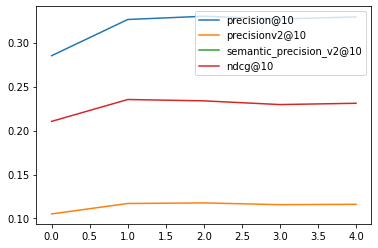

In [508]:
s = s1 + 'BCE'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

precision@10                0.296354
precisionv2@10              0.112024
semantic_precision_v2@10    0.216730
ndcg@10                     0.212829
Name: 4, dtype: float64

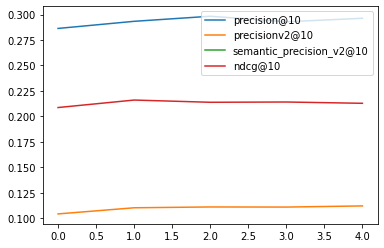

In [509]:
s = s1 + 'MSE'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

precision@10                0.313290
precisionv2@10              0.113057
semantic_precision_v2@10    0.223895
ndcg@10                     0.226814
Name: 4, dtype: float64

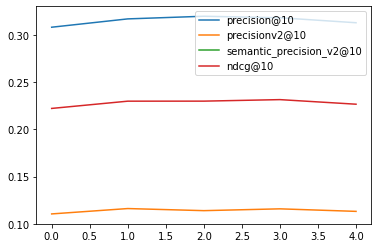

In [510]:
s = s1 + 'ListNet2'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

precision@10                0.309995
precisionv2@10              0.113165
semantic_precision_v2@10    0.219720
ndcg@10                     0.227216
Name: 4, dtype: float64

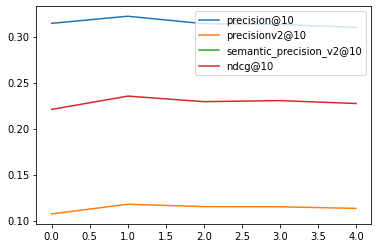

In [511]:
s = s1 + 'ListNet3'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

precision@10                0.315401
precisionv2@10              0.113111
semantic_precision_v2@10    0.226446
ndcg@10                     0.226671
Name: 4, dtype: float64

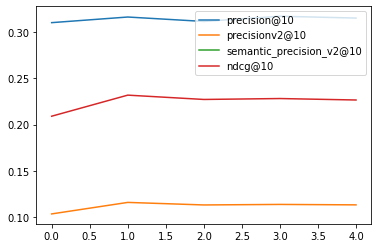

In [512]:
s = s1 + 'ListNet_sigmoid_L1'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

## Loss

In [312]:
exp_dir = 'experiment_loss'
x = [os.path.join(exp_dir, s) for s in sorted(os.listdir(exp_dir)) if keyword in s and keyword2 in s]
x

['experiment_loss/20news_mpnet_tf-idf_BCE',
 'experiment_loss/20news_mpnet_tf-idf_ListNet',
 'experiment_loss/20news_mpnet_tf-idf_ListNet2',
 'experiment_loss/20news_mpnet_tf-idf_ListNet3',
 'experiment_loss/20news_mpnet_tf-idf_ListNet4',
 'experiment_loss/20news_mpnet_tf-idf_ListNet_sigmoid_L1',
 'experiment_loss/20news_mpnet_tf-idf_MSE',
 'experiment_loss/20news_mpnet_tf-idf_MSE2',
 'experiment_loss/20news_mpnet_tf-idf_MSE3',
 'experiment_loss/20news_mpnet_tf-idf_MultiLabelMarginLoss']

In [415]:
exp_dir = 'experiment_loss_keybert'
x = [os.path.join(exp_dir, s) for s in sorted(os.listdir(exp_dir)) if keyword in s and keyword2 in s]
x

['experiment_loss_keybert/20news_mpnet_keybert_BCE',
 'experiment_loss_keybert/20news_mpnet_keybert_ListNet2',
 'experiment_loss_keybert/20news_mpnet_keybert_ListNet3',
 'experiment_loss_keybert/20news_mpnet_keybert_ListNet4',
 'experiment_loss_keybert/20news_mpnet_keybert_ListNet_sigmoid_L1',
 'experiment_loss_keybert/20news_mpnet_keybert_MSE',
 'experiment_loss_keybert/20news_mpnet_keybert_MSE3',
 'experiment_loss_keybert/20news_mpnet_keybert_MultiLabelMarginLoss',
 'experiment_loss_keybert/agnews_mpnet_keybert_BCE',
 'experiment_loss_keybert/agnews_mpnet_keybert_ListNet2',
 'experiment_loss_keybert/agnews_mpnet_keybert_ListNet3',
 'experiment_loss_keybert/agnews_mpnet_keybert_ListNet4',
 'experiment_loss_keybert/agnews_mpnet_keybert_ListNet_sigmoid_L1',
 'experiment_loss_keybert/agnews_mpnet_keybert_MSE',
 'experiment_loss_keybert/agnews_mpnet_keybert_MSE3',
 'experiment_loss_keybert/agnews_mpnet_keybert_MultiLabelMarginLoss']

In [422]:
# dir_f = 'experiment_loss'
dir_f = 'experiment_loss_keybert'
dir_f2 = 'dropout'


precision@10                0.808104
precisionv2@10              0.355817
semantic_precision_v2@10    0.397934
ndcg@10                     0.657681
Name: 30, dtype: float64

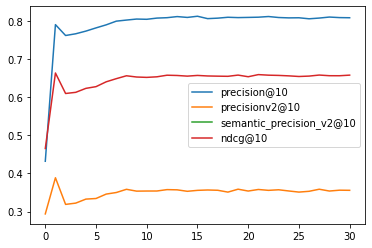

In [438]:
s = '20news_mpnet_keybert_MSE'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

precision@10                0.852940
precisionv2@10              0.462482
semantic_precision_v2@10    0.493132
ndcg@10                     0.754858
Name: 30, dtype: float64

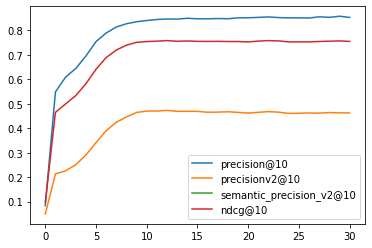

In [429]:
s = '20news_mpnet_keybert_MSE3'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

precision@10                0.844827
precisionv2@10              0.417496
semantic_precision_v2@10    0.450380
ndcg@10                     0.716044
Name: 30, dtype: float64

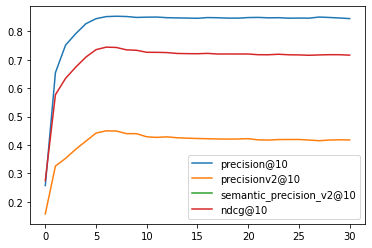

In [430]:
s = '20news_mpnet_keybert_BCE'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

precision@10                0.849462
precisionv2@10              0.427860
semantic_precision_v2@10    0.462067
ndcg@10                     0.722690
Name: 30, dtype: float64

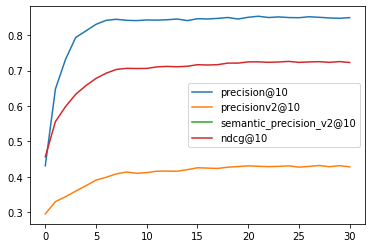

In [431]:
s = '20news_mpnet_keybert_ListNet_sigmoid_L1'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

precision@10                0.847581
precisionv2@10              0.360443
semantic_precision_v2@10    0.395895
ndcg@10                     0.649591
Name: 30, dtype: float64

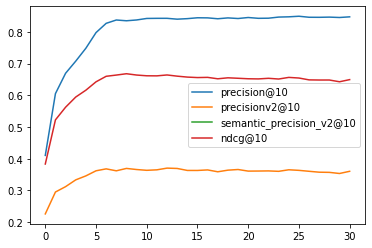

In [437]:
s = '20news_mpnet_keybert_MultiLabelMarginLoss'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

/home/chrisliu/virtual_env/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chrisliu/virtual_env/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


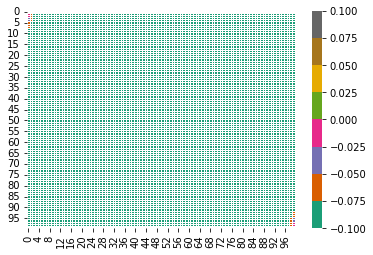

In [546]:
### BCE loss surface
def cal_loss(y, x):
    loss = y * np.log(x) + (1-y) * np.log(1-x)
    return loss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

loss_s = []
for i in range(len(x)):
    tmp = []
    for j in range(len(y)):
        tmp.append(cal_loss(y[j], x[i]))
    loss_s.append(tmp)

loss_s = np.array(loss_s)
sns.heatmap(loss_s , linewidth = 0.5 , cmap = 'Dark2' )

# print(loss_s.shape)
# plt.imshow(loss_s, cmap = 'rainbow' , interpolation = 'bilinear')
plt.show()